# Visualize CORES of FACETS results on TCGA dataset

In this notebook, we will see the results of FACETS on the TCGA dataset, specifically to see how well FACETS performs on non-matching sequences.

FACETS is an allele specific copy number analysis tool, therefore it performs analysis directly on SNPs. Although, FACETS requires that the tumor and normal sequence be from the same profile, so that the SNPs can be compared. However, our WES dataset does not provide matching normal sequences for each patient-derived tumor organoid. To see if FACETS is feasibly for calculating logR values, we will use the TCGA dataset to validate FACETS performance since the TCGA dataset provides matching normal sequences for multiple tumor patients.

### Install appropriate source libraries

In [1]:
setwd("~/Documents/Git-Projects/Git-Research-Projects/drug-response-prediction")
source("helperFunctions.R")
source("cnProfileVisualizationLibrary.R")
source("facetsAnalysisLibrary.R")

Loading required package: grid
Loading required package: IRanges
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: 'BiocGenerics'

The following objects are masked from 'package:parallel':

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs

The following objects are masked from 'package:base':

    anyDuplicated, append, as.data.frame, cbind, colMeans, colnames,
    colSums, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, lengths, Map, mapply, match,
    mget, order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rowMeans, rownames, rowSums, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which, which.max, which.min

Loading required pack

### Visualize the CN profile for the matching pair, with the CORES between all non-matching pairs

Here, we are viewing the logR CN profile for the matching pair. This means that FACETS was ran on the tumor SNP profile with the normal SNP profile from the same cancer patient. This is shown on the second track with the segments.

Below on the third track, we are viewing the cores (recurrent copy number events) for all FACETS results from the non-matching pair on the same tumor profile. The input to CORE were from the FACET results between the tumor SNP profile with the normal SNP profile from from a different cancer patient.

Preferably, we would like to see CORES only on the alteration events from the matching pair - which would infer that FACETS does not require a matching normal sequence for its allele-based analysis (at least for the calculation of logR since we know that logOR is very noisy between non-matching pairs). Below, we see that this is the case for most alteration intervals. Although, there are some occassional false positives/negatives.

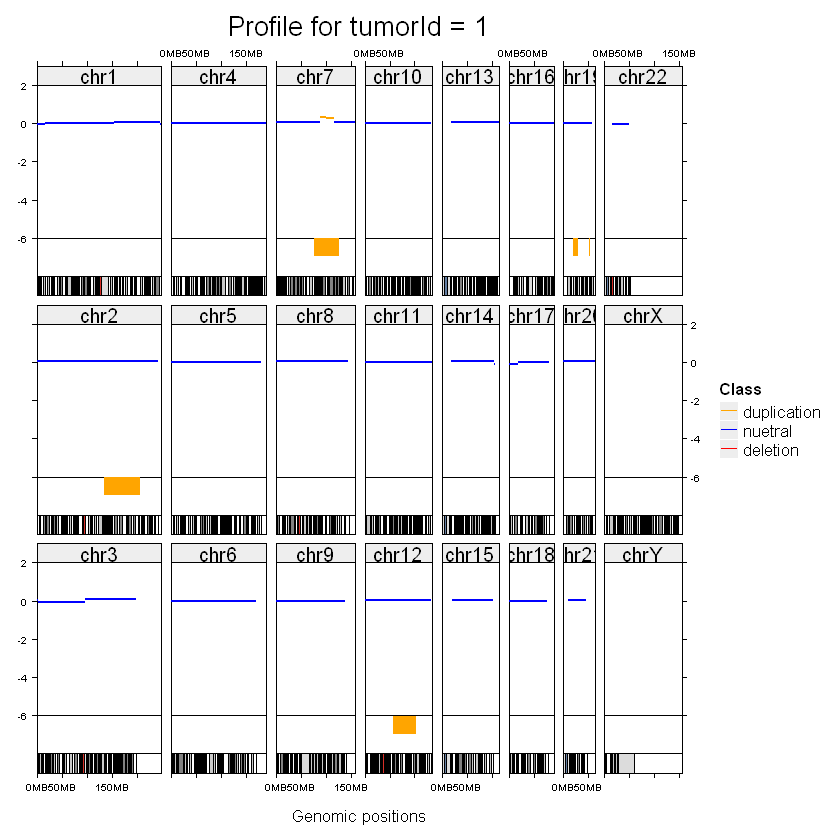

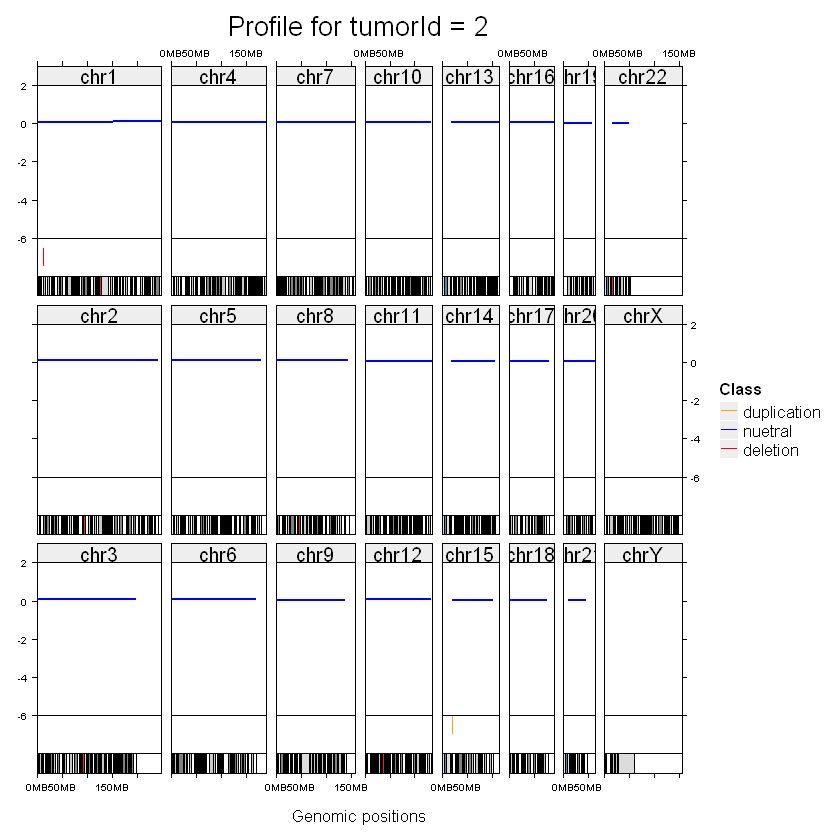

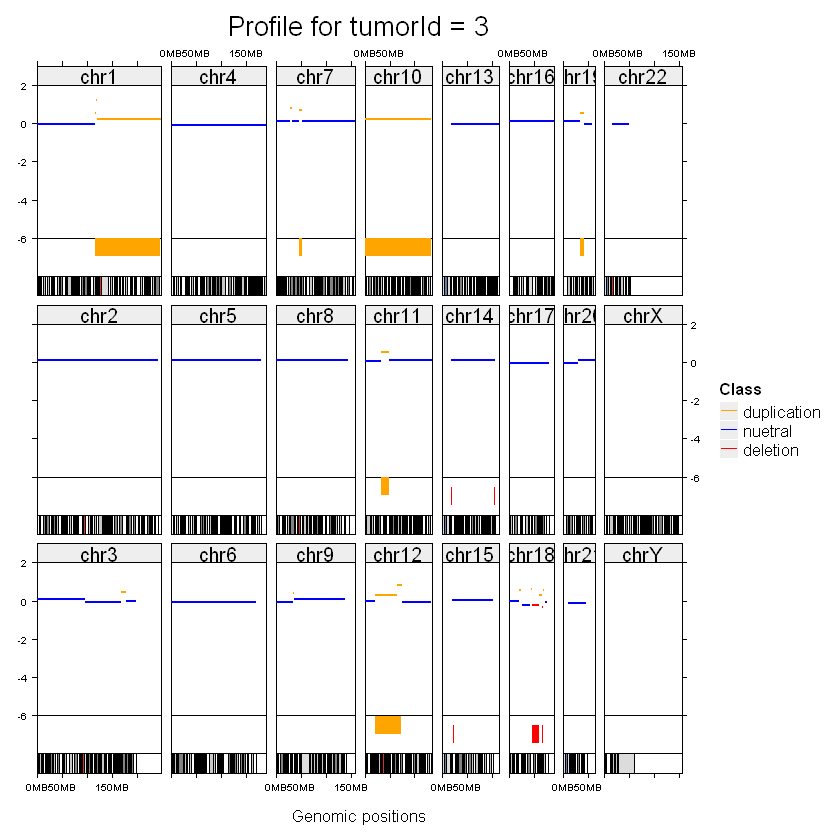

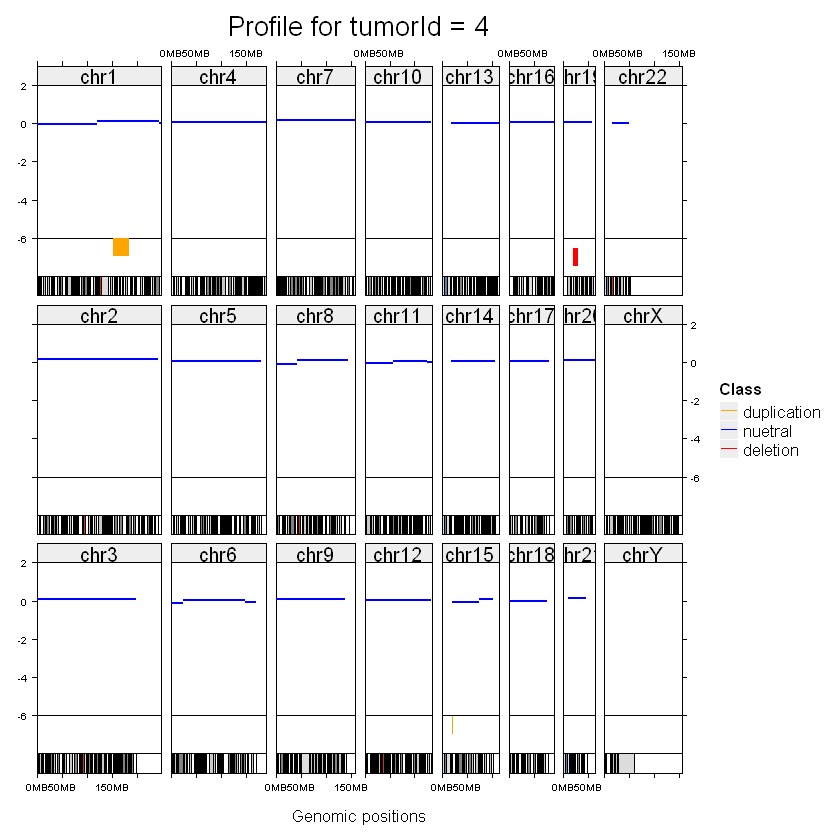

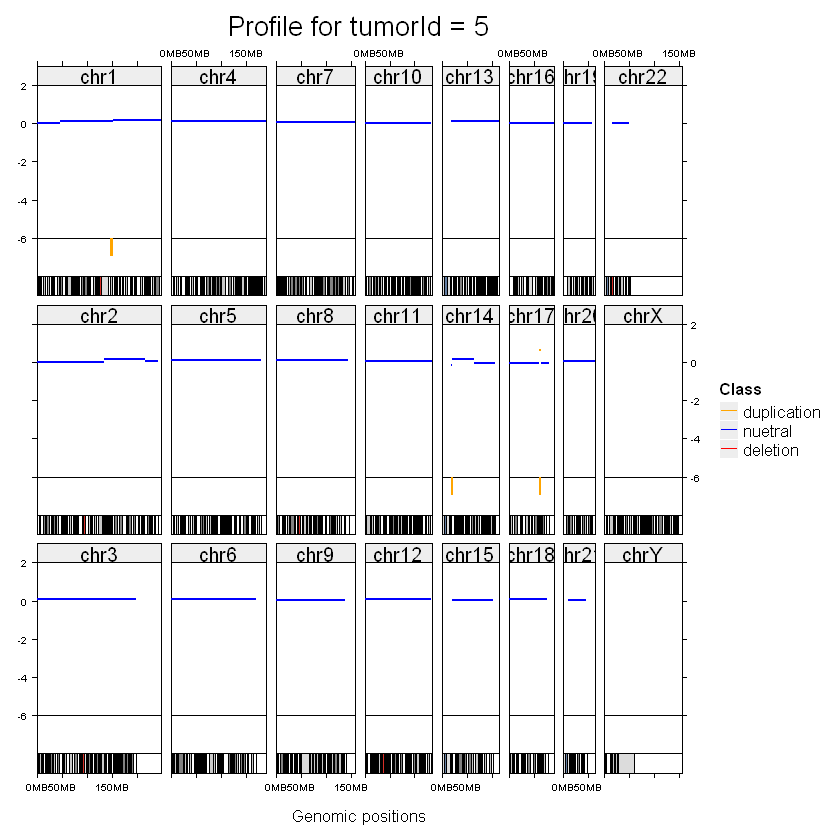

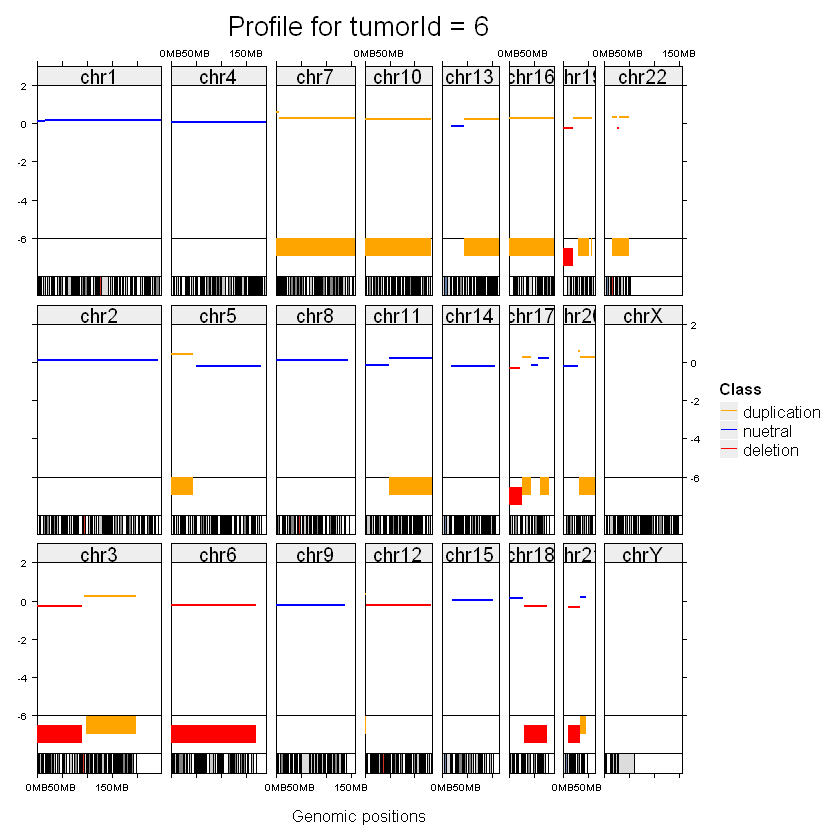

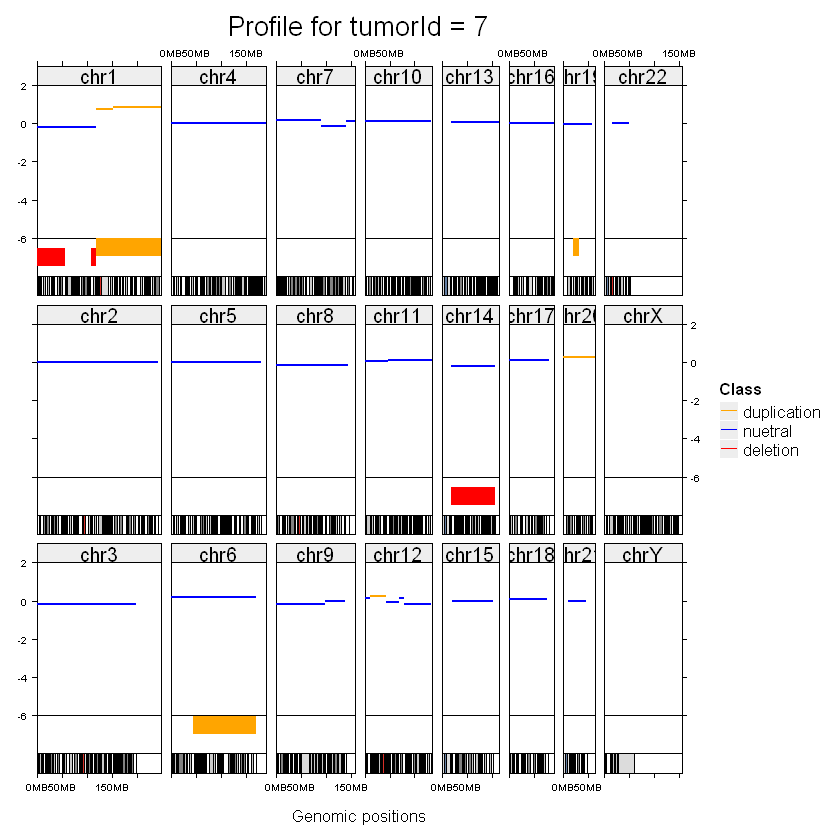

In [2]:
for(tumorId in seq(1, 7)){
    setwd(paste0("~/Documents/Git-Projects/Git-Research-Projects/FACETS_nonmatching_test/output"))
    raw_segments <- retrieveFacetsSegmentsFromObject(tumorId, tumorId, fitPrefix = "facetsG5Fit_", dir = "prev_run_4/") # Get matching tumor-normal pair 
    bed <- segmentsToBedFormat(raw_segments)

    setwd(paste0("~/Documents/Git-Projects/Git-Research-Projects/FACETS_nonmatching_test/cores"))
    Acores <- read.table(paste0("AcoresBP_t", tumorId, ".bed"), header = FALSE, sep = "\t") 
    Dcores <- read.table(paste0("DcoresBP_t", tumorId, ".bed"), header = FALSE, sep = "\t") 
    visualizeCNProfile(title = paste0("Profile for tumorId = ", tumorId), facets_segment_data = bed, Acores = Acores, Dcores = Dcores, save = FALSE)
}


In [1]:
tumorId <- 7

setwd(paste0("~/Documents/Git-Projects/Git-Research-Projects/FACETS_nonmatching_test/output"))
raw_segments <- retrieveFacetsSegmentsFromObject(tumorId, tumorId, fitPrefix = "facetsG5Fit_", dir = "prev_run_4/") # Get matching tumor-normal pair 
bed <- segmentsToBedFormat(raw_segments)

setwd(paste0("~/Documents/Git-Projects/Git-Research-Projects/FACETS_nonmatching_test/cores"))
Acores <- read.table(paste0("AcoresBP_t", tumorId, ".bed"), header = FALSE, sep = "\t") 
Dcores <- read.table(paste0("DcoresBP_t", tumorId, ".bed"), header = FALSE, sep = "\t") 
visualizeCNProfile(title = paste0("Profile for tumorId = ", tumorId), facets_segment_data = bed, Acores = Acores, Dcores = Dcores, save = FALSE)



ERROR: Error in retrieveFacetsSegmentsFromObject(tumorId, tumorId, fitPrefix = "facetsG5Fit_", : could not find function "retrieveFacetsSegmentsFromObject"


In [2]:
library(facets)

ERROR: Error in library(facets): there is no package called 'facets'
